In [1]:
import torch
from accelerate import Accelerator

accelerator = Accelerator()
device = accelerator.device
print(device)
print(f"{'='*20} Check cuda availability {'='*20}")

print(torch.cuda.is_available())

if torch.cuda.is_available():
    num_gpus = torch.cuda.device_count()

    if num_gpus > 0:
        for gpu in range(num_gpus):
            print(f"GPU {gpu}: {torch.cuda.get_device_name(gpu)}")
    else:
        print("No gpu")
else:
    print("cuda not available")

print(f"{'='*20} end check cuda availability {'='*20}")


/home/dip_3/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-01 16:18:37.098882: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 16:18:37.977838: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


cuda
==================== Check cuda availability ====================
True
GPU 0: NVIDIA A100-SXM4-40GB
==================== end check cuda availability ====================


In [2]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from matplotlib import pyplot as plt
import cv2

In [3]:
#custom_model_name = "microsoft/trocr-base-str"

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-str')
model = VisionEncoderDecoderModel.from_pretrained('./output_model/out-str-test/')

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [4]:
def plt_img(src_img):
    plt.imshow(src_img)
    plt.show()
    print(f"(h,w,c) : {src_img.shape}")

def ocr_str_img(src_img):
    pixel_values = processor(images=src_img, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    print(processor.batch_decode(generated_ids, skip_special_tokens=True))
    return processor.batch_decode(generated_ids, skip_special_tokens=True)[0]



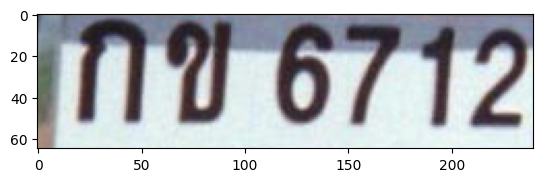

(h,w,c) : (65, 240, 3)
['กฆ 6712']


'กฆ 6712'

In [14]:
img1 = cv2.imread('./test_img/6.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img1 = img1[105:img1.shape[0]-490, 210:img1.shape[1]-750]
plt_img(img1)
ocr_str_img(img1)

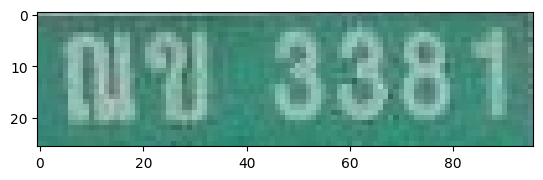

(h,w,c) : (26, 96, 3)
['กฆ 3381']


'กฆ 3381'

In [15]:
img1 = cv2.imread('./test_img/p2.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img1 = img1[3:img1.shape[0]-18, 10:img1.shape[1]-7]
plt_img(img1)
ocr_str_img(img1)

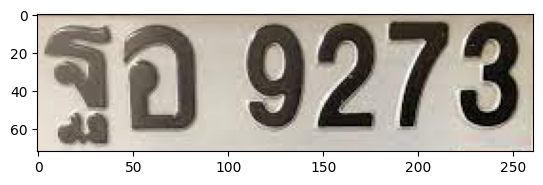

(h,w,c) : (72, 261, 3)
['ภถ 9273']


'ภถ 9273'

In [5]:
img1 = cv2.imread('./test_img/download.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img1 = img1[35:img1.shape[0]-76, 7:img1.shape[1]-7]
plt_img(img1)
ocr_str_img(img1)

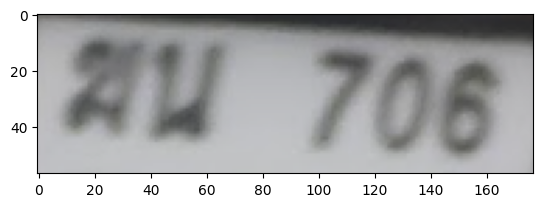

(h,w,c) : (57, 177, 3)
['ฑน 7706']


'ฑน 7706'

In [6]:
img1 = cv2.imread('./test_img/p4-origin.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img1 = img1[67:img1.shape[0]-45, 80:img1.shape[1]-60]
plt_img(img1)
ocr_str_img(img1)

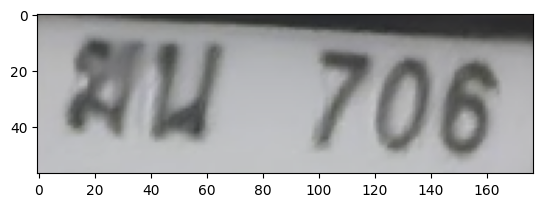

(h,w,c) : (57, 177, 3)
['ฑน 7706']


'ฑน 7706'

In [8]:
img1 = cv2.imread('./test_img/p3-deblur-baseline-gopro.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img1 = img1[67:img1.shape[0]-45, 80:img1.shape[1]-60]
plt_img(img1)
ocr_str_img(img1)

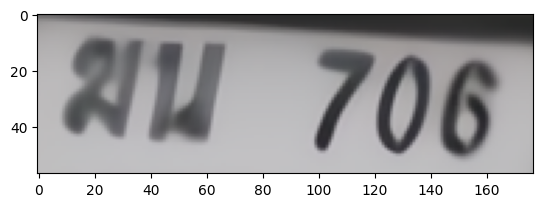

(h,w,c) : (57, 177, 3)
['ฆน 7706']


'ฆน 7706'

In [9]:
img1 = cv2.imread('./test_img/p3-deblur-reds.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img1 = img1[67:img1.shape[0]-45, 80:img1.shape[1]-60]
plt_img(img1)
ocr_str_img(img1)